## EDA

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving BIKE DETAILS.csv to BIKE DETAILS (1).csv
User uploaded file "BIKE DETAILS (1).csv" with length 66450 bytes


In [ ]:
'''
1. Read the Bike Details dataset into a Pandas DataFrame and display its
first 10 rows.
(Show the shape and column names as well.)

->
'''

import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('BIKE DETAILS.csv')

# Display the first 10 rows
print("First 10 rows:")
display(df.head(10))

# Display the shape of the DataFrame
print("\nShape of the DataFrame:")
print(df.shape)

# Display the column names
print("\nColumn names:")
print(df.columns)

First 10 rows:


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0



Shape of the DataFrame:
(1061, 7)

Column names:
Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')


In [ ]:
'''
2. Check for missing values in all columns and describe your approach for
handling them.

->
'''

# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Fill missing values in 'ex_showroom_price' with the median
median_ex_showroom_price = df['ex_showroom_price'].median()
df['ex_showroom_price'] = df['ex_showroom_price'].fillna(median_ex_showroom_price)

# Verify that there are no more missing values in 'ex_showroom_price'
print("Missing values after imputation:")
print(df.isnull().sum())

Missing values in each column:
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64
Missing values after imputation:
name                 0
selling_price        0
year                 0
seller_type          0
owner                0
km_driven            0
ex_showroom_price    0
dtype: int64


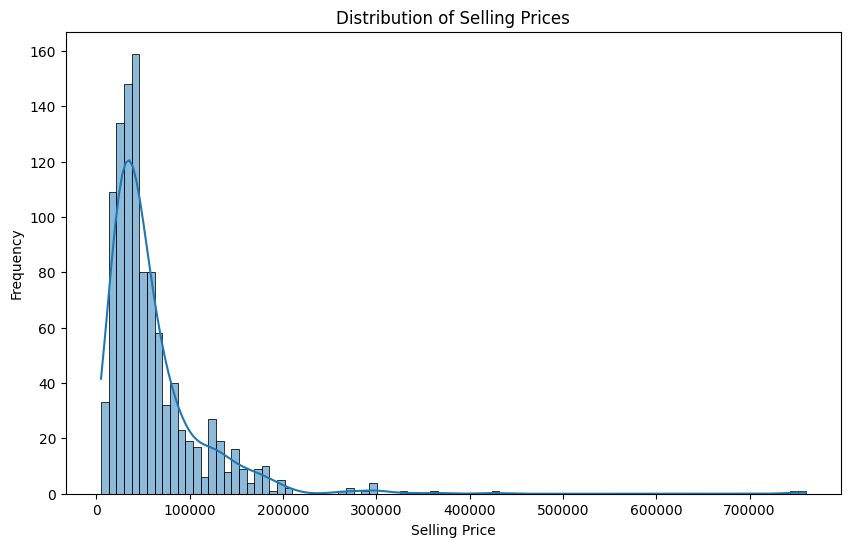

In [ ]:
'''
3. Plot the distribution of selling prices using a histogram and describe the
overall trend.

->
'''

import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of selling prices
plt.figure(figsize=(10, 6))
sns.histplot(df['selling_price'], kde=True)
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

**Observation:**

The histogram shows that the distribution of selling prices is skewed to the right, indicating that most bikes are sold at lower prices, with fewer bikes being sold at higher prices. There are a few bikes with significantly higher selling prices, which appear as outliers in the distribution.

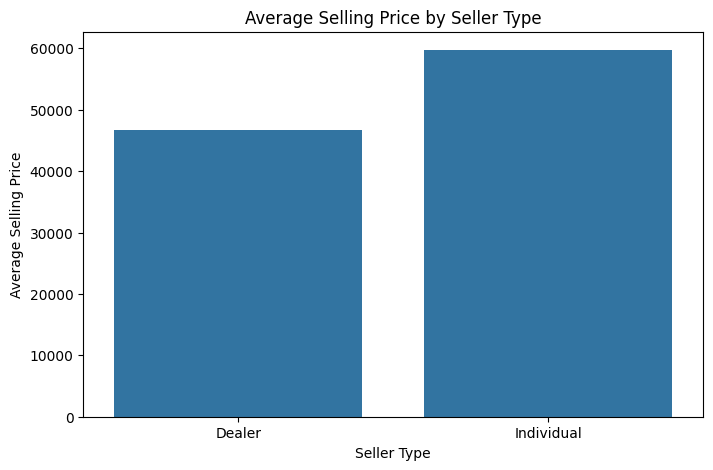

In [ ]:
'''
4. Create a bar plot to visualize the average selling price for each seller_type
and write one observation.

->
'''
# Calculate the average selling price for each seller type
average_selling_price_by_seller_type = df.groupby('seller_type')['selling_price'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x='seller_type', y='selling_price', data=average_selling_price_by_seller_type)
plt.title('Average Selling Price by Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Average Selling Price')
plt.show()

**Observation:**

The bar plot shows that individuals tend to sell bikes at a higher average price compared to dealers.

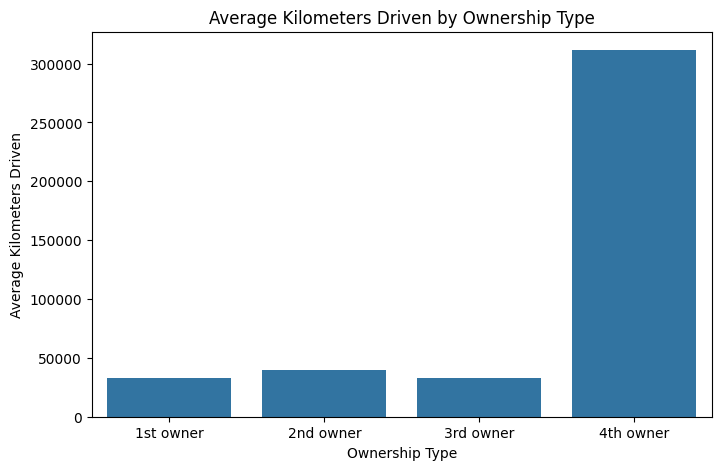

In [ ]:
'''
5. Compute the average km_driven for each ownership type (1st owner,
2nd owner, etc.), and present the result as a bar plot.

->
'''
# Compute the average km_driven for each ownership type
average_km_driven_by_owner = df.groupby('owner')['km_driven'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x='owner', y='km_driven', data=average_km_driven_by_owner)
plt.title('Average Kilometers Driven by Ownership Type')
plt.xlabel('Ownership Type')
plt.ylabel('Average Kilometers Driven')
plt.show()

In [ ]:
'''
6. Use the IQR method to detect and remove outliers from the km_driven
column. Show before-and-after summary statistics.

->
'''
# Before removing outliers
print("Summary statistics of km_driven before outlier removal:")
display(df['km_driven'].describe())

# Calculate IQR
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_cleaned = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)].copy()

# After removing outliers
print("\nSummary statistics of km_driven after outlier removal:")
display(df_cleaned['km_driven'].describe())

Summary statistics of km_driven before outlier removal:


,km_driven
count,1061.000000
mean,34359.833176
std,51623.152702
min,350.000000
25%,13500.000000
50%,25000.000000
75%,43000.000000
max,880000.000000



Summary statistics of km_driven after outlier removal:


,km_driven
count,1022.000000
mean,28203.415851
std,19552.083583
min,350.000000
25%,13000.000000
50%,24000.000000
75%,40000.000000
max,86000.000000


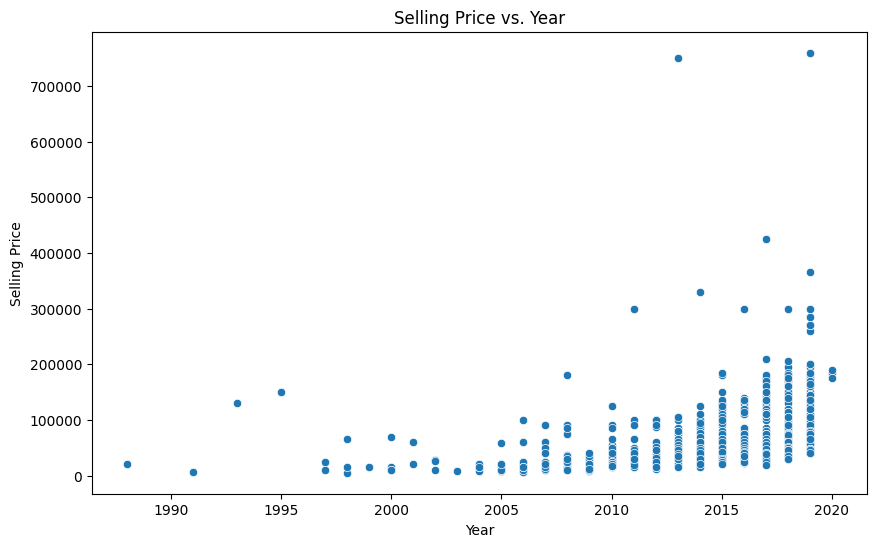

In [ ]:
'''
7. Create a scatter plot of year vs. selling_price to explore the
relationship between a bike's age and its price.

->
'''
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='selling_price', data=df)
plt.title('Selling Price vs. Year')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()

In [ ]:
'''
8. Convert the seller_type column into numeric format using one-hot
encoding. Display the first 5 rows of the resulting DataFrame.

->
'''
# Convert 'seller_type' to numeric using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['seller_type'], drop_first=True)

# Display the first 5 rows of the resulting DataFrame
print("DataFrame after one-hot encoding 'seller_type':")
display(df_encoded.head())

DataFrame after one-hot encoding 'seller_type':


,name,selling_price,year,owner,km_driven,ex_showroom_price,seller_type_Individual
0,Royal Enfield Classic 350,175000,2019,1st owner,350,72752.5,True
1,Honda Dio,45000,2017,1st owner,5650,72752.5,True
2,Royal Enfield Classic Gunmetal Grey,150000,2018,1st owner,12000,148114.0,True
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,1st owner,23000,89643.0,True
4,Yamaha SZ [2013-2014],20000,2011,2nd owner,21000,72752.5,True


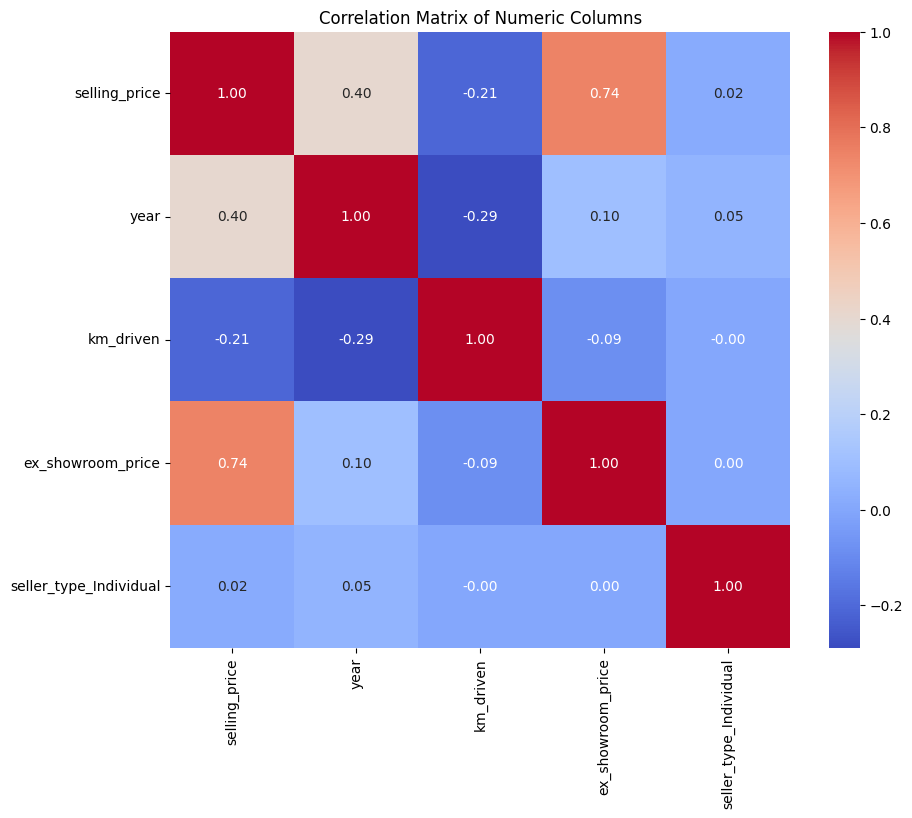


Notable correlations:
selling_price           selling_price             1.000000
ex_showroom_price       selling_price             0.744075
year                    selling_price             0.402188
ex_showroom_price       year                      0.100066
year                    seller_type_Individual    0.050293
selling_price           seller_type_Individual    0.017382
seller_type_Individual  ex_showroom_price         0.001359
                        km_driven                -0.001314
km_driven               ex_showroom_price        -0.086791
                        selling_price            -0.212937
year                    km_driven                -0.288675
dtype: float64


In [ ]:
'''
9. Generate a heatmap of the correlation matrix for all numeric columns.
What correlations stand out the most?

->
'''
# Select only numeric columns for correlation analysis
numeric_df = df_encoded.select_dtypes(include=['number', 'bool'])

# Generate the correlation matrix
correlation_matrix = numeric_df.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

print("\nNotable correlations:")
print(correlation_matrix.unstack().sort_values(kind="quicksort", ascending=False).drop_duplicates())

**Observation:**

Based on the correlation matrix, the most notable correlations are:

**Selling Price and Ex-showroom Price (0.74):** There is a strong positive correlation between the selling price and the ex-showroom price, which is expected as the original price of the bike heavily influences its resale value.

**Selling Price and Year (0.40):** There is a moderate positive correlation between selling price and year, suggesting that newer bikes tend to have higher selling prices.

**Year and Km Driven (-0.29):** There is a moderate negative correlation between the year and kilometers driven, indicating that older bikes generally have been driven more.

**Selling Price and Km Driven (-0.21):** There is a weak negative correlation between selling price and kilometers driven, suggesting that bikes with higher mileage tend to have slightly lower selling prices.

In [ ]:
'''
10: Summarize your findings in a brief report:
● What are the most important factors affecting a bike's selling price?
● Mention any data cleaning or feature engineering you performed.

->
'''

print("Summary Report:\n")

print("Most Important Factors Affecting a Bike's Selling Price:")
print("- Ex-showroom Price: There is a strong positive correlation between ex-showroom price and selling price (0.74), indicating that the original price is a major factor in resale value.")
print("- Year: Newer bikes (higher year) tend to have higher selling prices (moderate positive correlation of 0.40).")
print("- Kilometers Driven: While weaker, there is a negative correlation (-0.21) suggesting bikes with higher mileage may have slightly lower selling prices.")
print("- Seller Type: The analysis showed that individuals tend to sell bikes at a higher average price compared to dealers.")

print("\nData Cleaning and Feature Engineering Performed:")
print("- Missing values in the 'ex_showroom_price' column were imputed with the median value.")
print("- Outliers in the 'km_driven' column were detected and removed using the IQR method.")
print("- The 'seller_type' column was converted into a numeric format using one-hot encoding.")

Summary Report:

Most Important Factors Affecting a Bike's Selling Price:
- Ex-showroom Price: There is a strong positive correlation between ex-showroom price and selling price (0.74), indicating that the original price is a major factor in resale value.
- Year: Newer bikes (higher year) tend to have higher selling prices (moderate positive correlation of 0.40).
- Kilometers Driven: While weaker, there is a negative correlation (-0.21) suggesting bikes with higher mileage may have slightly lower selling prices.
- Seller Type: The analysis showed that individuals tend to sell bikes at a higher average price compared to dealers.

Data Cleaning and Feature Engineering Performed:
- Missing values in the 'ex_showroom_price' column were imputed with the median value.
- Outliers in the 'km_driven' column were detected and removed using the IQR method.
- The 'seller_type' column was converted into a numeric format using one-hot encoding.
